<a href="https://colab.research.google.com/github/antoniosql/cursoml/blob/master/demos/Conjunto_de_datos_de_Affairs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teoría sobre la infidelidad matrimonial
http://www.statsmodels.org/stable/datasets/generated/fair.html
  
https://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf 

In [0]:
#Importamos los modulos y librerias que vamos a necesitar
!pip install statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import seaborn as sns

from patsy import dmatrices
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#dta.columns = ['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ', 'occupation', 'occupation_husb','affairs']

In [0]:
#Cargamos los datos
dta = sm.datasets.fair.load_pandas().data
dta.head(10)

In [0]:
#Informacion sobre el dataset: descripcion general, origen, 
#definicion de variables,tipo de variables

print(sm.datasets.fair.NOTE)
print(sm.datasets.fair.SOURCE)
print(sm.datasets.fair.DESCRLONG)

dta.info()

In [0]:
#Comprobamos que no falten datos (Resultado booleano: true=falta dato, false=dato)
#Tambien se puede visualizar si faltan datos con los mapas de calor de seaborn.
#En este caso, no hace falta.

dta.isnull().head(10)

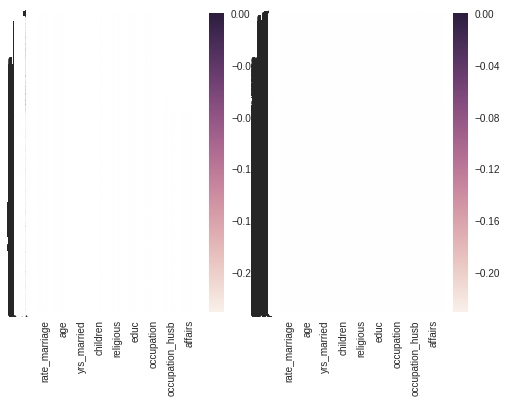

In [0]:
sns.set() 
fig, ax = plt.subplots(1,2) 
sns.heatmap(dta, vmin=-0.231049, vmax=0, annot=True, fmt='f', annot_kws={"size": 15}, ax=ax[0]) 
sns.heatmap(dta, vmin=-0.231049, vmax=0, annot=True, fmt='f', annot_kws={"size": 10}, ax=ax[1]); 

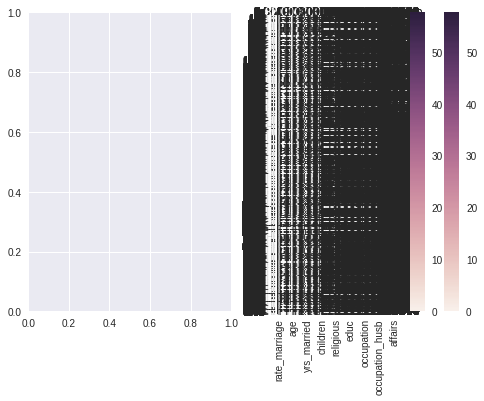

In [0]:
sns.set() 
fig, ax = plt.subplots(1,2) 
sns.heatmap(dta,  annot=True, fmt='f') 
sns.heatmap(dta,  annot=True, fmt='f'); 

El signo del índice de correlación también nos da información.  Si el índice de correlación entre dos variables es positivo, significa que, si una de ellas aumenta, la otra también lo hace. Por el contrario,  cuando el signo es negativo, si una variable aumenta, la otra, disminuye.  Por ejemplo, para affairs y rate_marriage es negativo. Esto indica que las personas que valoran más su matrimonio (rate_marriage creciente), tienen menos aventuras extramaritales (affairs decreciente).

In [0]:
# Veamos ahora la matriz de correlacion. 
# Deberiamos eliminar las variables altamente correlacionadas >0,90
# Edad, años matrimonio-- logica
# Correlacion positiva--religious/rate marriage,age/yrs_marriage
# Correlacion negativa: affairs/children, religious

print(dta.corr())


In [0]:

#Edad, años matrimonio-- logicamente no son independientes, para eliminarlos habria que hacer:
#dta.drop(['age','yrs_married'],axis=1,inplace=True)
#dta.head()

El histograma sobre la influencia del nivel educativo también arroja resultados interesantes. El menor número de infidelidades se produce en los niveles extremos: mujeres con nivel básico de educación o profesionales con una muy alta cualificación-

In [0]:
#Para que muestre los graficos en el notebook añadimos:
%matplotlib inline

# histograma sobre influencia del nivel educativo
dta.educ.hist()
plt.title('Influencia del Nivel Educativo')
plt.xlabel('Nivel Academico')
plt.ylabel('Frecuencia infidelidad')

También podemos observar la influencia de los años de matrimonio:

In [0]:
#Para que muestre los graficos en el notebook añadimos:
%matplotlib inline

# histograma sobre influencia de los años de matrimonio
dta.yrs_married.hist()
plt.title('Histograma Años de Matrimonio')
plt.xlabel('Años de Matrimonio')
plt.ylabel('Frecuencia infidelidad')